<center><h1> Formation en Machine Learning et Deep Learning</h1></center>
<center><h3> Atelier1 : comprendre la Classification Supervisée </h3></center>

**Objectif** : Former les participants à l'entraînement d'un modèle de classification supervisée en utilisant un dataset simple et visuel. L'atelier inclut l'exploration des données, l'entraînement du modèle et la visualisation des résultats.

Exemple d'application (simple):
Prédiction d'admission à une université en fonction du score d'examen et du score d'entretien.

***Données:***
Nous allons utiliser un modèle de classification supervisée pour prédire si un étudiant sera accepté ou refusé en fonction de deux critères :
*   le score d'examen
*   le score d'entretien

***Algorithme de classification:***
Nous allons utiliser la Régression logistique


<H3>Chargement et Exploration des Données</H3>
Importer les bibliothèques et charger le dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

print('Bibliothèques importées avec succès !')

Bibliothèques importées avec succès !


**Explication des bibliothèques**:
*   NumPy - Manipulation des tableaux numériques
*   Pandas - Manipulation et Analyse de Données
*   Matplotlib - Visualisation des données
*   Seaborn - Visualisation avancée des données
*   Scikit-Learn - Bibliothèque de Machine Learning:

train_test_split: Diviser les données en des données d'entrainement et de validation (test). <br>
StandardScaler: Normaliser les données pour de meilleures performances.<br>
LogisticRegression: Modèle de classification Régression logistique<br>
accuracy_score, classification_report, confusion_matrix: les métriques d'évaluation<br>

<H3> Exemple simple </H3>
Prédire l'acceptation ou non d'un candidat à un concours utilisant ses notes d'examen écrit et son score d'entretien

In [2]:
import pandas as pd

# Création du dataset fictif
data = {
    "Score_Examen": [50, 55, 60, 65, 70, 75, 80, 85, 88, 90, 92, 95],
    "Score_Entretien": [30, 35, 40, 45, 50, 55, 60, 65, 68, 70, 75, 80],
    "Admission": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 1 = Accepté, 0 = Refusé
}

df = pd.DataFrame(data)

# Affichage des premières lignes
print(df.head())
print(f"\nShape du dataset : {df.shape}")
print(f"\nDistribution des classes :\n{df['Admission'].value_counts()}")

   Score_Examen  Score_Entretien  Admission
0            50               30          0
1            55               35          0
2            60               40          0
3            65               45          0
4            70               50          0

Shape du dataset : (12, 3)

Distribution des classes :
Admission
1    7
0    5
Name: count, dtype: int64


**Visualiser les données**

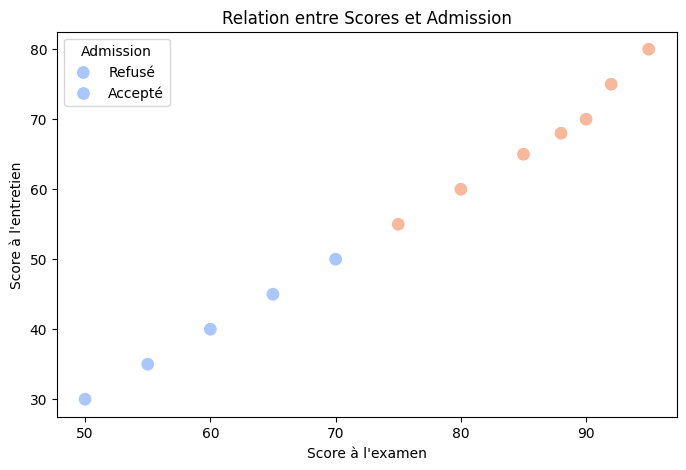

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Score_Examen"], y=df["Score_Entretien"], hue=df["Admission"], palette="coolwarm", s=100)
plt.xlabel("Score à l'examen")
plt.ylabel("Score à l'entretien")
plt.title("Relation entre Scores et Admission")
plt.legend(title="Admission", labels=["Refusé", "Accepté"])
plt.show()

Chaque point représente un étudiant. Les couleurs montrent s'il a été accepté (1) ou refusé (0). <br>
Le but du modèle est d'apprendre à tracer une frontière de décision qui sépare les étudiants acceptés et refusés.

**Prétraitement des Données et Séparation**

X: Représente la matrice de caractéristiques. Nous avons deux caractéristiques "Score_Examen" et "Score_Entretien".

y: représente les labels. 1 si accepté et 0 si refusé

In [4]:
X = df[["Score_Examen", "Score_Entretien"]]
y = df["Admission"]

print("X (features) :")
print(X.head())
print("\ny (labels) :")
print(y.values)

X (features) :
   Score_Examen  Score_Entretien
0            50               30
1            55               35
2            60               40
3            65               45
4            70               50

y (labels) :
[0 0 0 0 0 1 1 1 1 1 1 1]


Nous allons diviser les données en 80% pour les données d'entrainement et 20% pour les données de validation ou de test.

X_train et y_train sont les données et labels d'entrainement.

X_test et y_test sont les données et labels de validation.

In [5]:
from sklearn.model_selection import train_test_split

# Séparer X et y en ensembles d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille des données d'entraînement : {X_train.shape}")
print(f"Taille des données de test : {X_test.shape}")

Taille des données d'entraînement : (9, 2)
Taille des données de test : (3, 2)


**Normalisation des données (StandardScaler)**

La normalisation est essentielle pour que les modèles comme la Régression Logistique, SVM et KNN convergent correctement et rapidement.
- `fit_transform` sur X_train : apprend la moyenne et l'écart-type, puis transforme
- `transform` sur X_test : applique la même transformation (sans réapprendre)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Données normalisées avec succès !")
print(f"Moyenne X_train avant : {X_train.mean().values}")
print(f"Moyenne X_train après : {X_train_scaled.mean(axis=0).round(4)}")

Données normalisées avec succès !
Moyenne X_train avant : [74.77777778 55.33333333]
Moyenne X_train après : [ 0. -0.]


<h3>Entraînement d'un Modèle de Classification</h3>
Nous allons utiliser un modèle simple pour la classification: Régression Logistique

In [7]:
from sklearn.linear_model import LogisticRegression

# Création du modèle
model = LogisticRegression(penalty='l2', max_iter=1000)

# Entraînement du modèle
model.fit(X_train_scaled, y_train)

print("Modèle entraîné avec succès !")

Modèle entraîné avec succès !


In [8]:
# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

print("Prédictions :", y_pred)
print("Valeurs réelles :", y_test.values)
print(f"\nAccuracy : {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

Prédictions : [1 1 0]
Valeurs réelles : [1 1 0]

Accuracy : 1.00

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<H3>Comparaison de Plusieurs Modèles de Classification</H3>

Nous allons comparer 5 algorithmes :
1. Régression Logistique (LR)
2. Support Vector Machine (SVM) avec différents kernels (linear, rbf)
3. Decision Tree (DT)
4. K-Nearest Neighbors (KNN)
5. Random Forest (RF)

Nous allons entraîner chaque modèle, prédire les classes et évaluer leurs performances.

<h4>1- Régression Logistique</h4>

In [9]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(
    penalty='l2',       # Type de régularisation : 'l1', 'l2', 'elasticnet', 'none'
    max_iter=1000,      # Augmenté à 1000 pour assurer la convergence
)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Régression Logistique - Accuracy :", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Régression Logistique - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>2- Support Vector Machine (SVM)</h4>

**SVM avec Kernel Linéaire**

In [10]:
from sklearn.svm import SVC

model_svm_linear = SVC(
    kernel='linear',    # Type de noyau : 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,              # Paramètre de régularisation
    gamma='scale',      # 'scale' = 1 / (n_features * variance)
    max_iter=-1         # Nombre max d'itérations (-1 = illimité)
)
model_svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = model_svm_linear.predict(X_test_scaled)

print("SVM (Linear Kernel) - Accuracy :", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

SVM (Linear Kernel) - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



**SVM avec Kernel RBF (Radial Basis Function)**

In [11]:
from sklearn.svm import SVC

model_svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = model_svm_rbf.predict(X_test_scaled)

print("SVM (RBF Kernel) - Accuracy :", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))

SVM (RBF Kernel) - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>3- Decision Tree (DT)</h4>

In [12]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(
    criterion='gini',   # Fonction d'évaluation : 'gini' ou 'entropy'
    splitter='best',    # 'best' = meilleur split, 'random' = split aléatoire
    random_state=42
)
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)

print("Decision Tree - Accuracy :", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>4- K-Nearest Neighbors (KNN)</h4>

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(
    n_neighbors=5,          # Nombre de voisins considérés K=5
    metric='minkowski',     # Fonction de distance
)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

print("KNN (k=5) - Accuracy :", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN (k=5) - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>5- Random Forest (RF)</h4>

In [14]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=100,   # Nombre d'arbres dans la forêt
    criterion='gini',   # Fonction d'évaluation : 'gini' ou 'entropy'
    random_state=42,    # Fixe la graine pour la reproductibilité
)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

print("Random Forest - Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<H4>Comparaison des Modèles</H4>

Comparer la précision de chaque modèle

               Modèle  Accuracy
Régression Logistique       1.0
         SVM (Linear)       1.0
            SVM (RBF)       1.0
        Decision Tree       1.0
            KNN (k=5)       1.0
        Random Forest       1.0


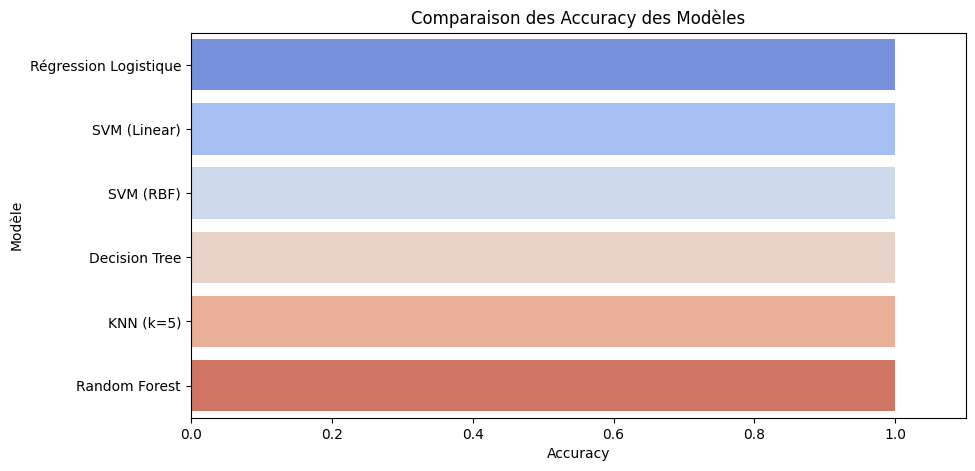

In [15]:
models = {
    "Régression Logistique": (model_lr, y_pred_lr),
    "SVM (Linear)": (model_svm_linear, y_pred_svm_linear),
    "SVM (RBF)": (model_svm_rbf, y_pred_svm_rbf),
    "Decision Tree": (model_dt, y_pred_dt),
    "KNN (k=5)": (model_knn, y_pred_knn),
    "Random Forest": (model_rf, y_pred_rf)
}

accuracies = {name: accuracy_score(y_test, pred) for name, (model, pred) in models.items()}

# Afficher les résultats sous forme de tableau
df_results = pd.DataFrame(list(accuracies.items()), columns=["Modèle", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results.to_string(index=False))

# Visualisation des résultats
plt.figure(figsize=(10,5))
sns.barplot(x="Accuracy", y="Modèle", data=df_results, palette="coolwarm")
plt.title("Comparaison des Accuracy des Modèles")
plt.xlim(0, 1.1)
plt.show()